<a href="https://colab.research.google.com/github/engmahaq8/The_AI_Engineer/blob/main/Advanced_clustering_pca_k_means_dbscan_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00


In [3]:
#read dataset
data = pd.read_csv("/content/drive/MyDrive/The AI Engineer /unsupervised learning /Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Data Info :

In [5]:
# lets see the dimensions of the data -> data shape
data.shape

(167, 10)

In [6]:
# data columns
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<Axes: >

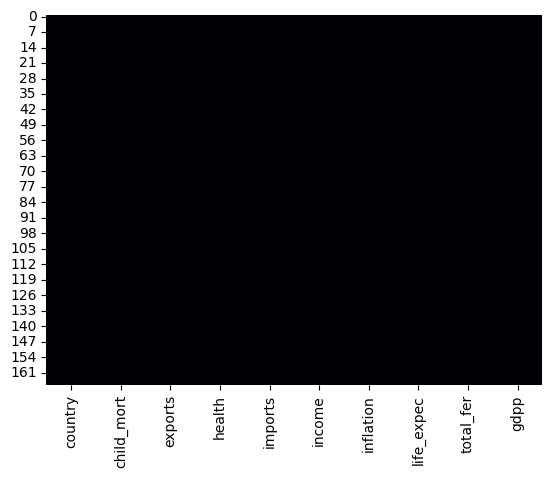

In [7]:
#display the heat map of the null data
sns.heatmap(data.isnull(), cmap = 'magma', cbar=False)

In [8]:
data.isnull().sum().sum()

0

No null values present in the data!








In [9]:

data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


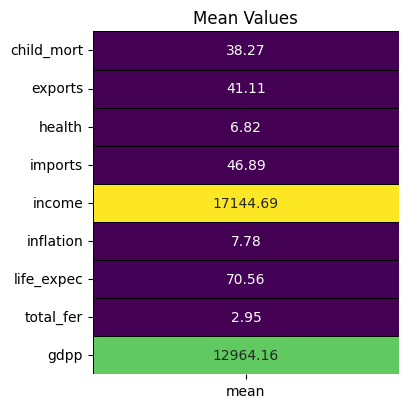

In [10]:
#create a subplot with 1 row, 1 col and figure size (5,5)
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'viridis',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

**Exploratory Data Analysis**



### Aim:
- **Objective**: Cluster countries based on numerical features.
- **Type**: Unsupervised Learning problem statement.

### Dataset Attributes:
- **country**: Name of the country.
- **child_mort**: Death of children under 5 years of age per 1000 live births.
- **exports**: Exports of goods and services per capita, given as a percentage of the GDP per capita.
- **health**: Total health spending per capita, given as a percentage of GDP per capita.
- **imports**: Imports of goods and services per capita, given as a percentage of the GDP per capita.
- **Income**: Net income per person.
- **Inflation**: The measurement of the annual growth rate of the total GDP.
- **life_expec**: The average number of years a newborn child would live if current mortality patterns continue.
- **total_fer**: The number of children that would be born to each woman if the current age-fertility rates remain unchanged.
- **gdpp**: The GDP per capita, calculated as the total GDP divided by the total population.

In [11]:
col = list(data.columns)
col.remove('country') #remove the country value
categorical_features = ['country']
numerical_features = [*col]  # This uses the unpacking operator * to create a new list numerical_features
        #containing all the elements in col. At this point, col should contain all the columns except for 'country',
        # implying these are considered numerical features.
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


For this dataset, as the number of features are less, we manually check the dataset.
Clearly, except country, all the features are numerical features with their element datatype being either float or integer.
We use the typical approach for division of features i.e based on the datatypes of the elements of the respective feature.
Eg : datatype = integer, feature = numerical feature ; datatype = string, feature = categorical featur

Distribution of Features :

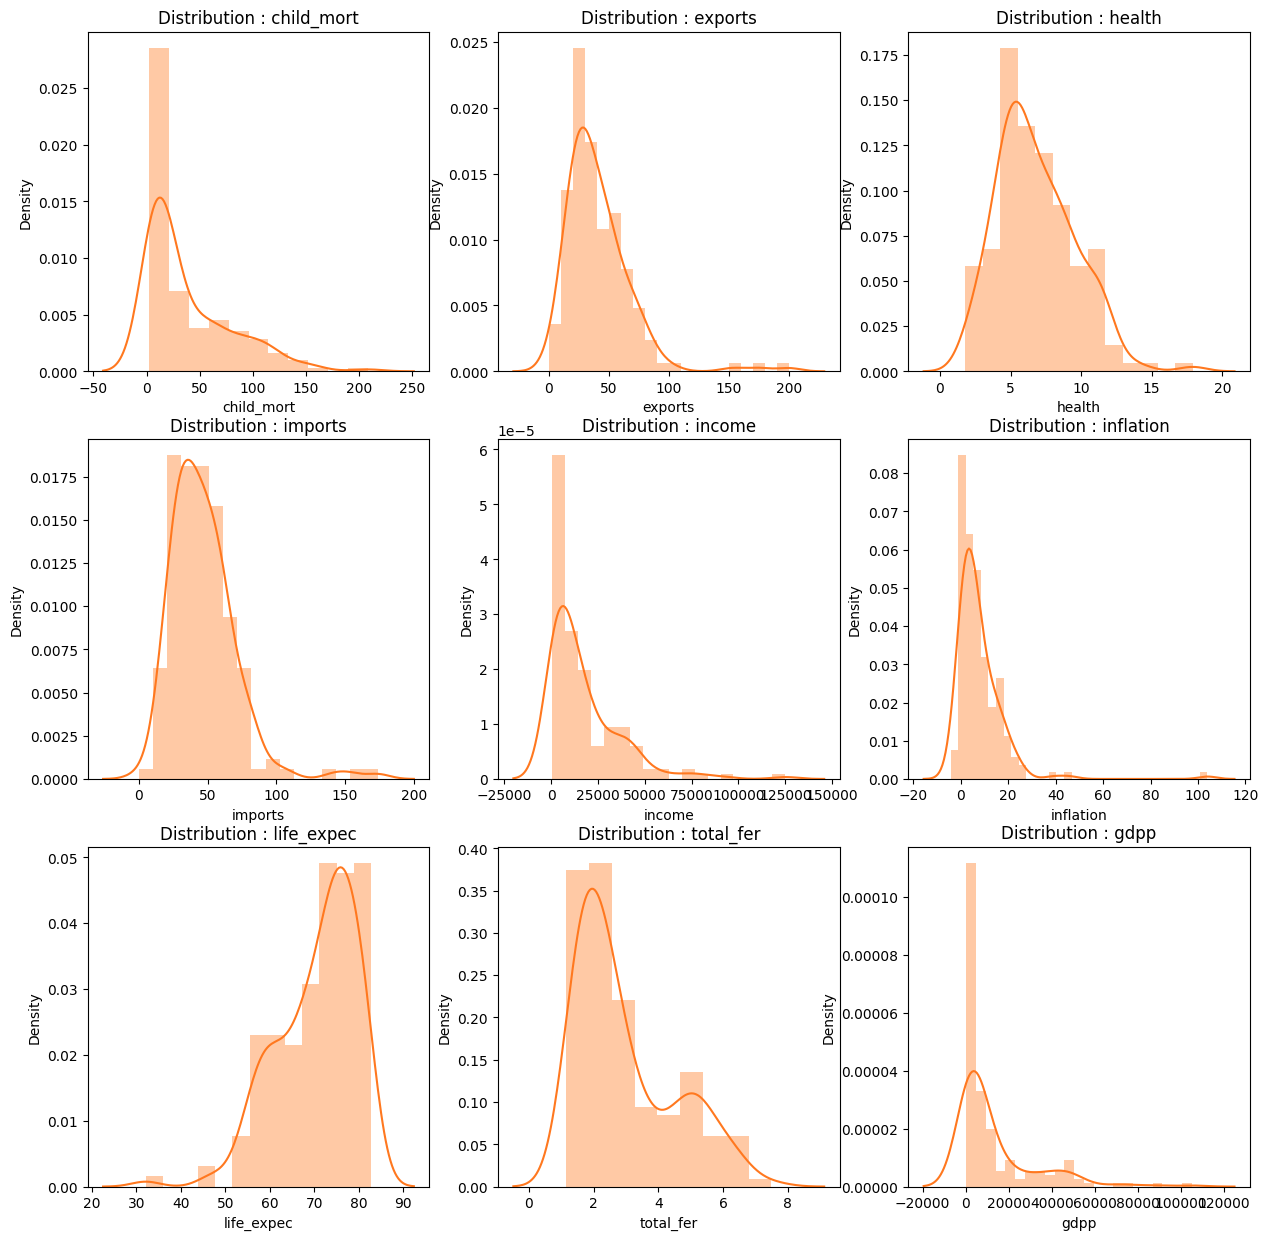

In [12]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()



*   life_expec displays a left or negatively skewed data distribution.
*   health displays a normally distrubuted data.


*   All the remaining features show a right or positively skewed data distribution.
*  Data distribution of country is not put out as it has text data and it has the same number of unique values as the length of the dataframe

Features of Economically Backward Countries :

- **Per Capita Income**: Very low income levels.
- **Population**: High population leading to non-availability of resources.
- **Unemployment**: Resulting from limited resources.
- **Wealth Distribution**: Low overall country wealth leading to insufficient capital.
- **Income Inequality**: Inequitable distribution of wealth and income.
- **Education**: Lack of proper educational amenities, resulting in high illiteracy rates.
- **Living Conditions**: Low standard of living.
- **Technological Advancements**: Absence of technical advancement.
- **Health Services**: Poor health services combined with high birth and death rates.

**Target**: HELP Foundation should focus on countries exhibiting these characteristics for assistance.

# country vs Numerical Features

child_mort : Economically backward nations have a high infant mortality rate!

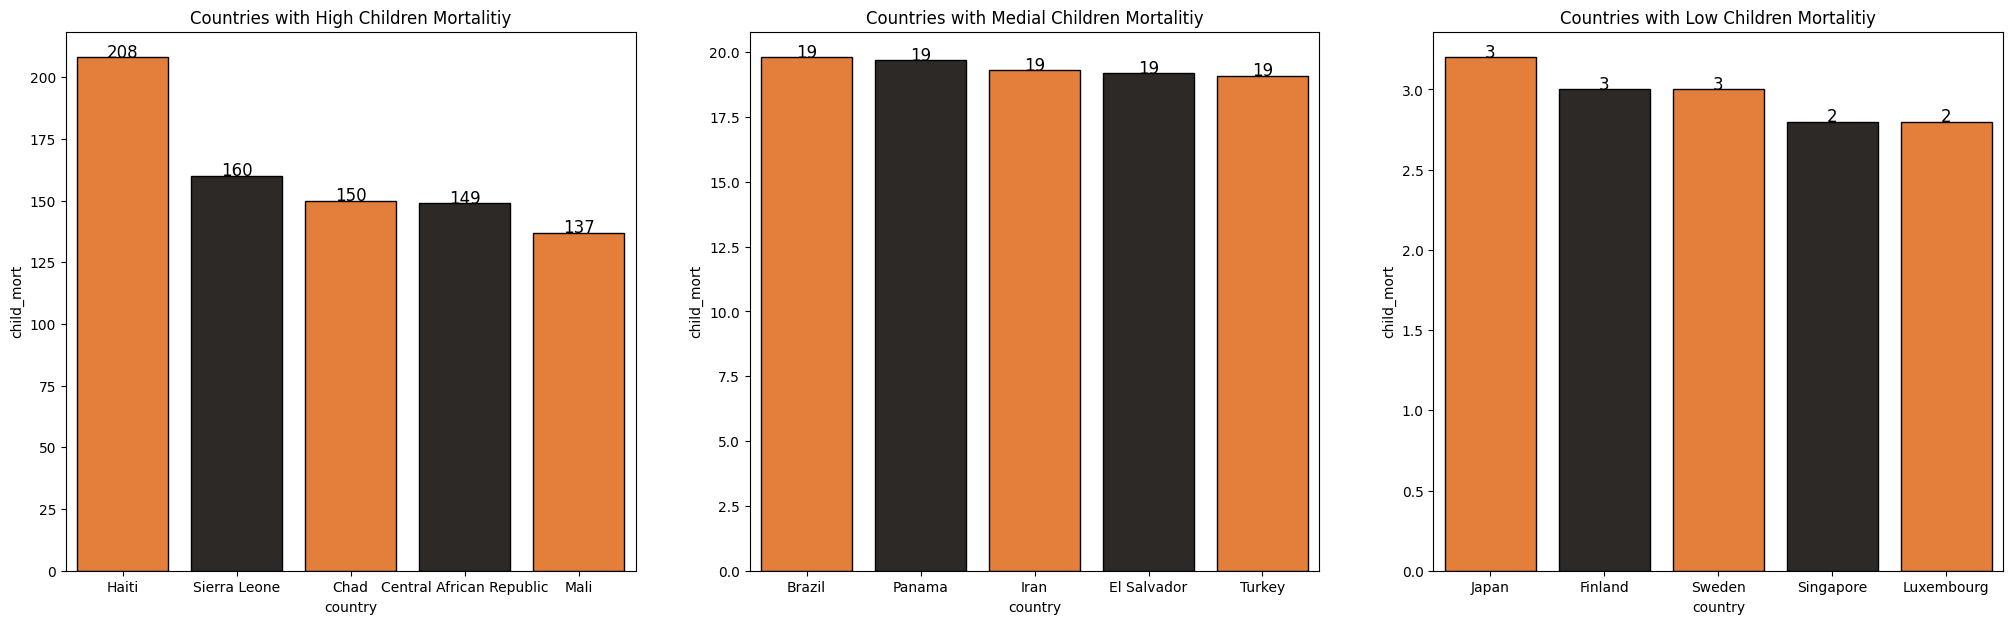

In [13]:
#create 3 subplots with 1 row 3 cols and figsize is 25,7
fig = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
plt.subplot(1,3,1)#start with the first subplot
#use sns barplot for country and child mort
#also use iloc to get the high children moratility
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
#use sns barplot for country and child mort
#also use iloc to get the middle children moratility
ax = sns.barplot(x = 'country',y = 'child_mort' ,  data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');

plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
#use sns barplot for country and child mort
#also use iloc to get the low children moratility
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()



### Child Mortality:
- **Highest Child Deaths**: Haiti has the highest rate of children's deaths.
- **Significant Positions**: African countries also rank high in child mortality statistics.
- **Lower Child Mortality**: Countries from Asia and Europe are prominently positioned at the other extreme of child mortality statistics.

### Exports:
- **Importance**: Exports are a critical factor for building a nation's economy.
- **Economy Strength**: Higher exports lead to a stronger economy and greater wealth generation for the nation.

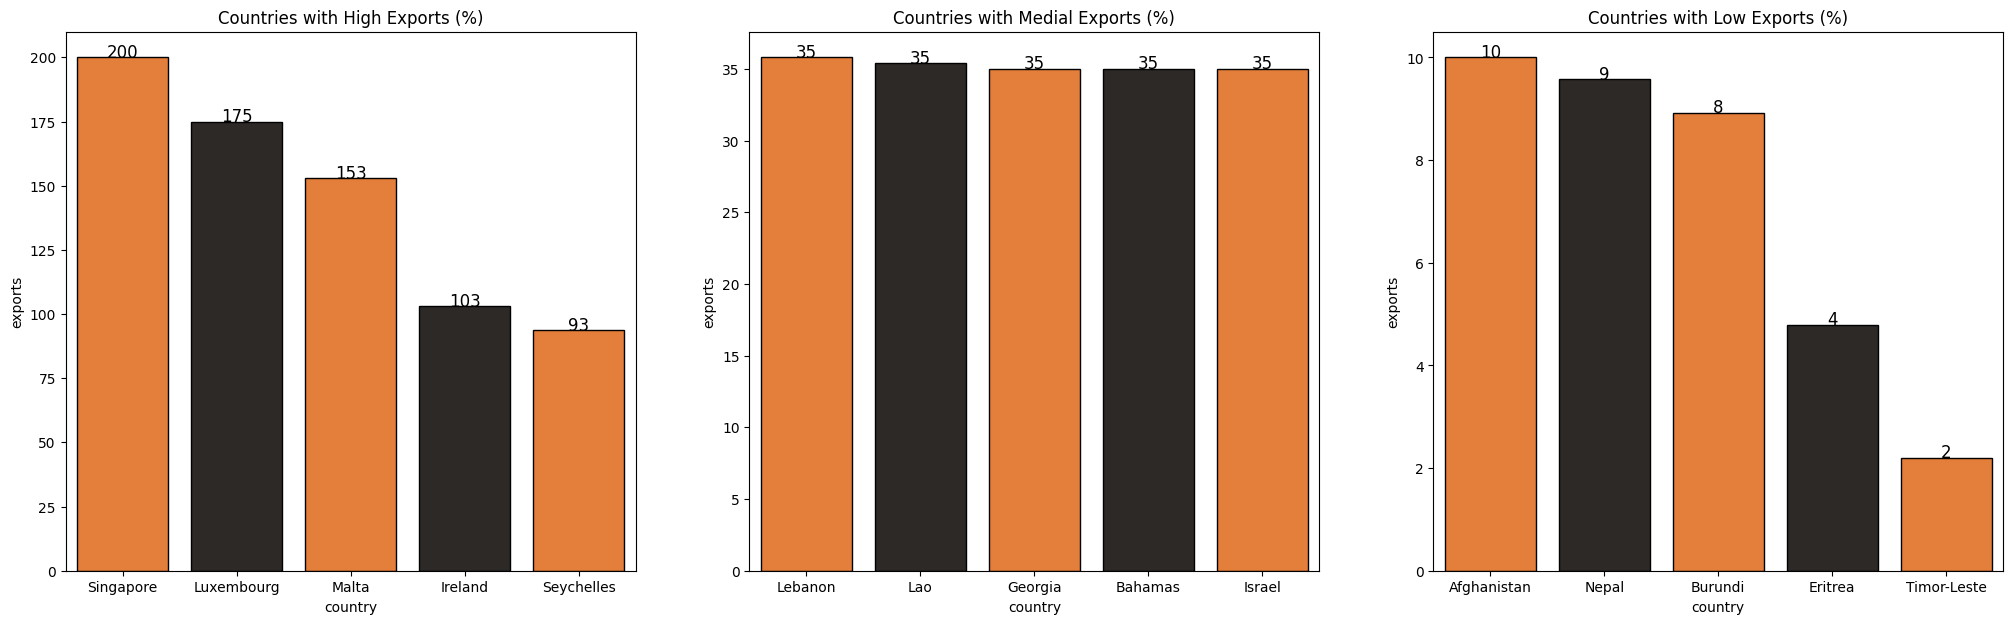

In [14]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()



- **Exports of a Nation**:
  - Goods and services created domestically but sold to other nations.
  - Influenced by factors such as:
    - Geographical location.
    - Natural resources.
    - Population size.
    - Population preferences toward specific skills.

- **Nations with High Exports**:
  - **Singapore**:
    - Despite not being in the top 100 by population size, it has the highest number of exports.
  - **Luxembourg and Malta**:
    - Likely follow a similar route as Singapore.

- **Nations with Low Exports**:
  - **Afghanistan and Nepal**:
    - Geographical location heavily influences their export levels.
    - Lower exports often correlate with smaller geographical areas.

health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!

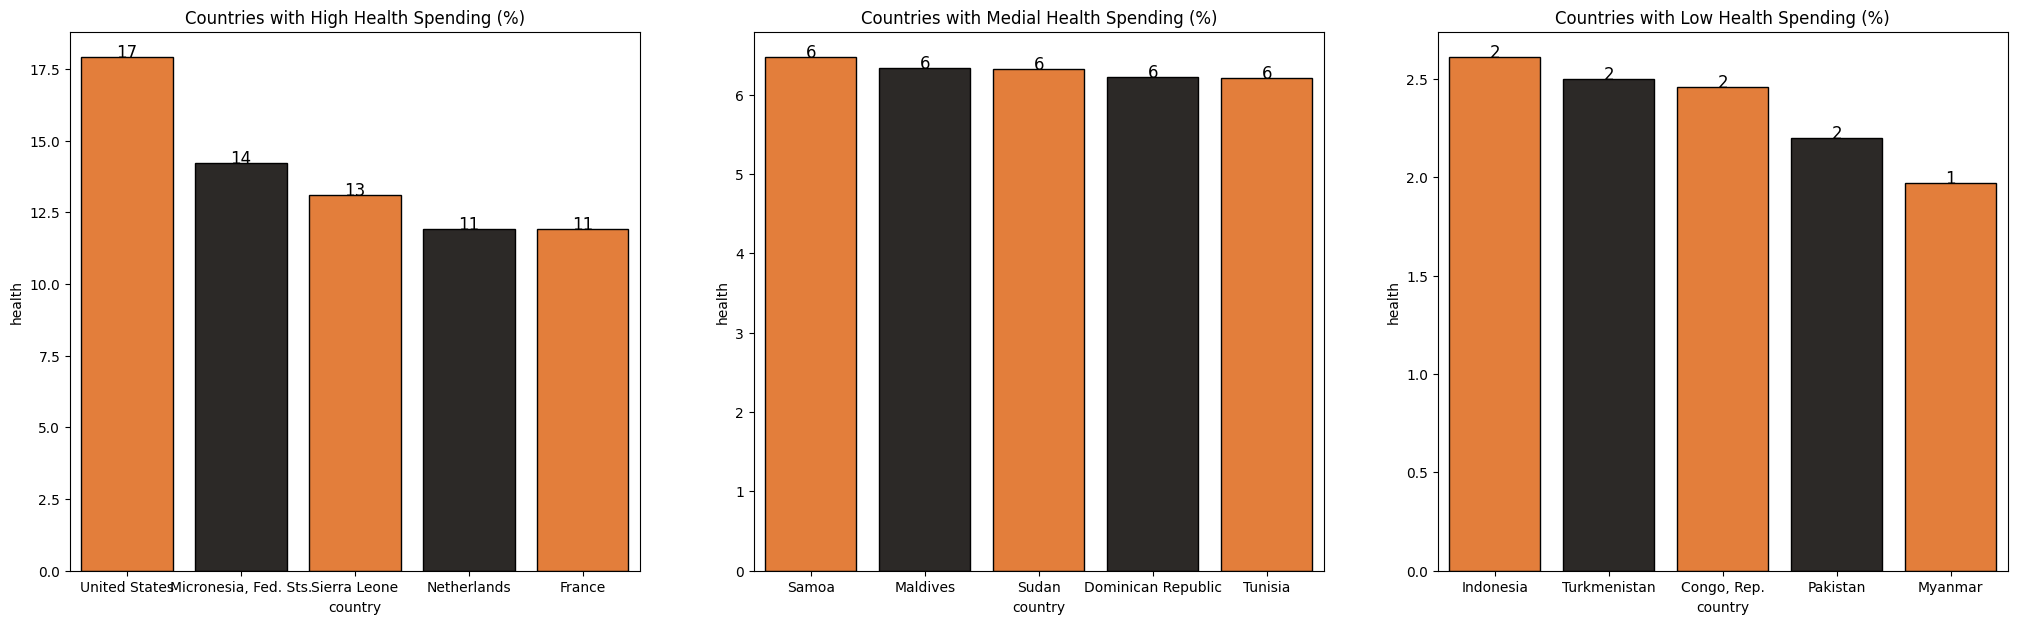

In [15]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()




- **Highest Health Spending**:
  - The United States has the highest spending on health, contributing **17% of its GDP**.
  - The mean individual spending on health among U.S. citizens is approximately **6%**.

- **Lowest Health Spending**:
  - Asian countries dominate the lower end of health spending, with contributions of **less than 3%**.

- **General Observation**:
  - Citizens in these Asian countries are described as being **the most ignorant when it comes to health**.


**imports** : It is another attribute that determines the reliance of the nations on other nations for the goods and services!

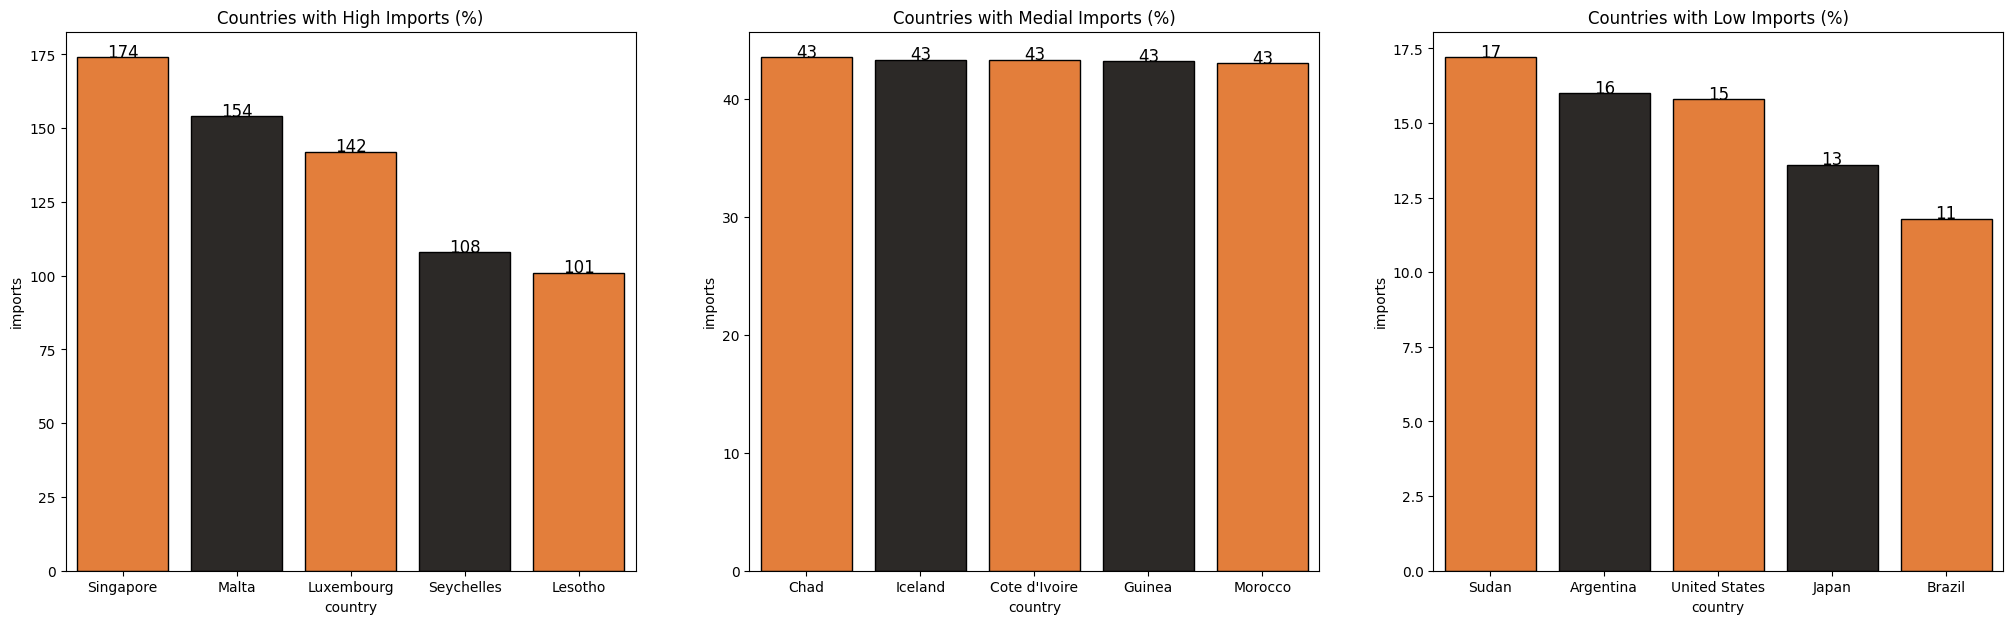

In [16]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

- Imports and exports statistics of a nation describe its self-reliance to solve problems despite potential handicaps in essential resources.  
- Singapore, Malta, Luxembourg, and Seychelles are in the top 5 for both exports and imports, indicating strategic use of resources:  
  - These nations likely capitalize on their strengths to create significant exports while balancing the books with heavy imports of other goods.  
- Brazil has the lowest imports among all nations at 11%.  
- Sudan is the only African country in the lower import percentage list, with imports at 17%.  

**income** : Income of the per person is a key indicator about country's economic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!


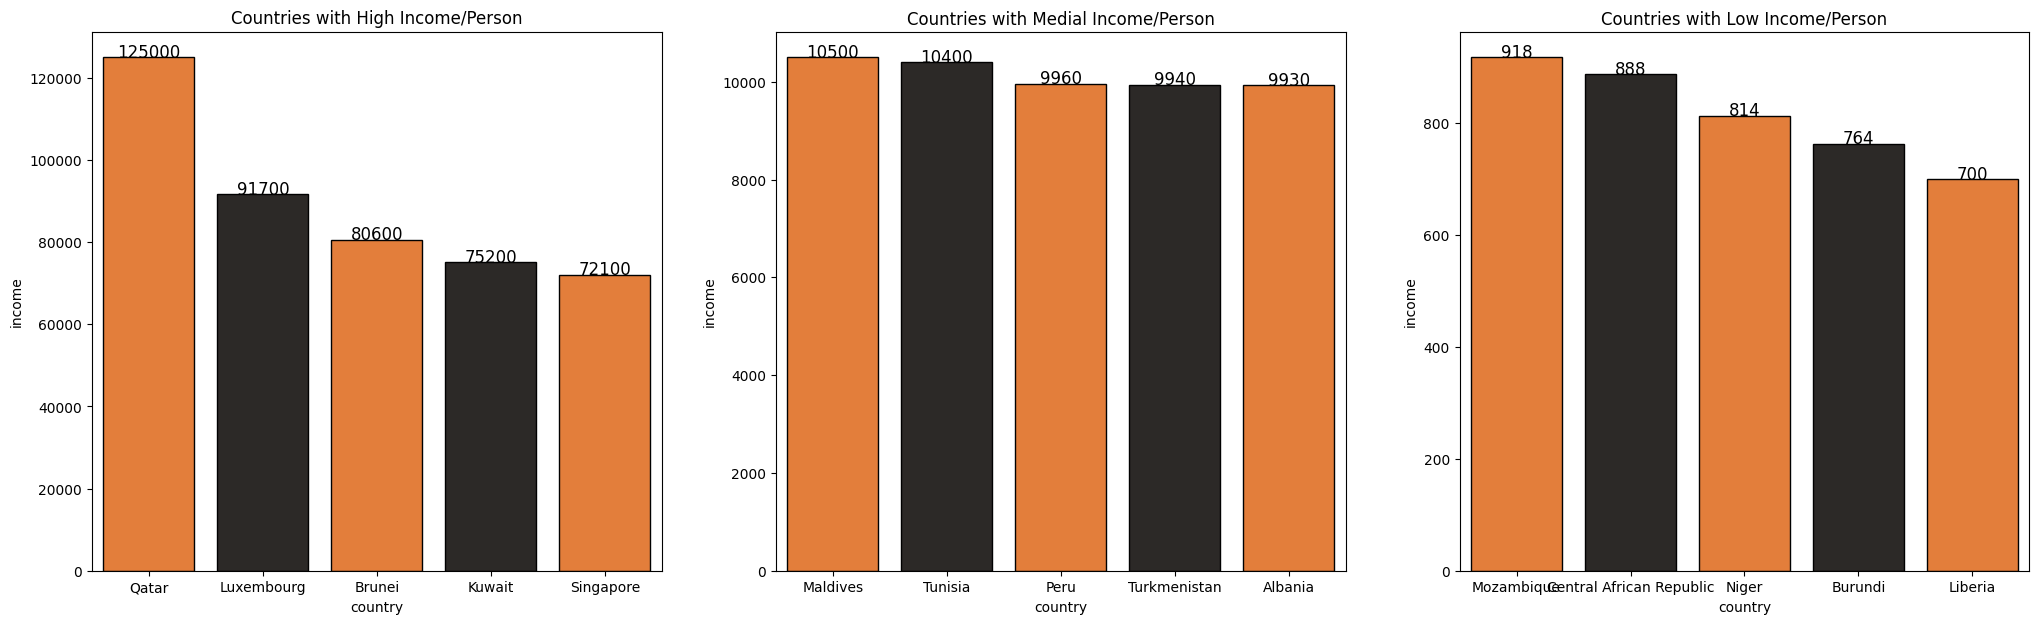

In [17]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

- Citizens of Qatar have the highest income globally, with a difference of $30,000 more than the second-placed countries.  
- Singapore and Luxembourg are also present in the top 5 for this income feature.  
- The lower end of income is dominated by African nations:  
  - This is largely influenced by the lasting damage caused by colonization, from which these nations have not yet fully recovered.  
- The income disparity among the top, middle, and lower-end nations is significant:  
  - This disparity impacts various other features and metrics.  

**inflation **: It dictates the state of the economy, strength of the currency as well as demand for goods & services!

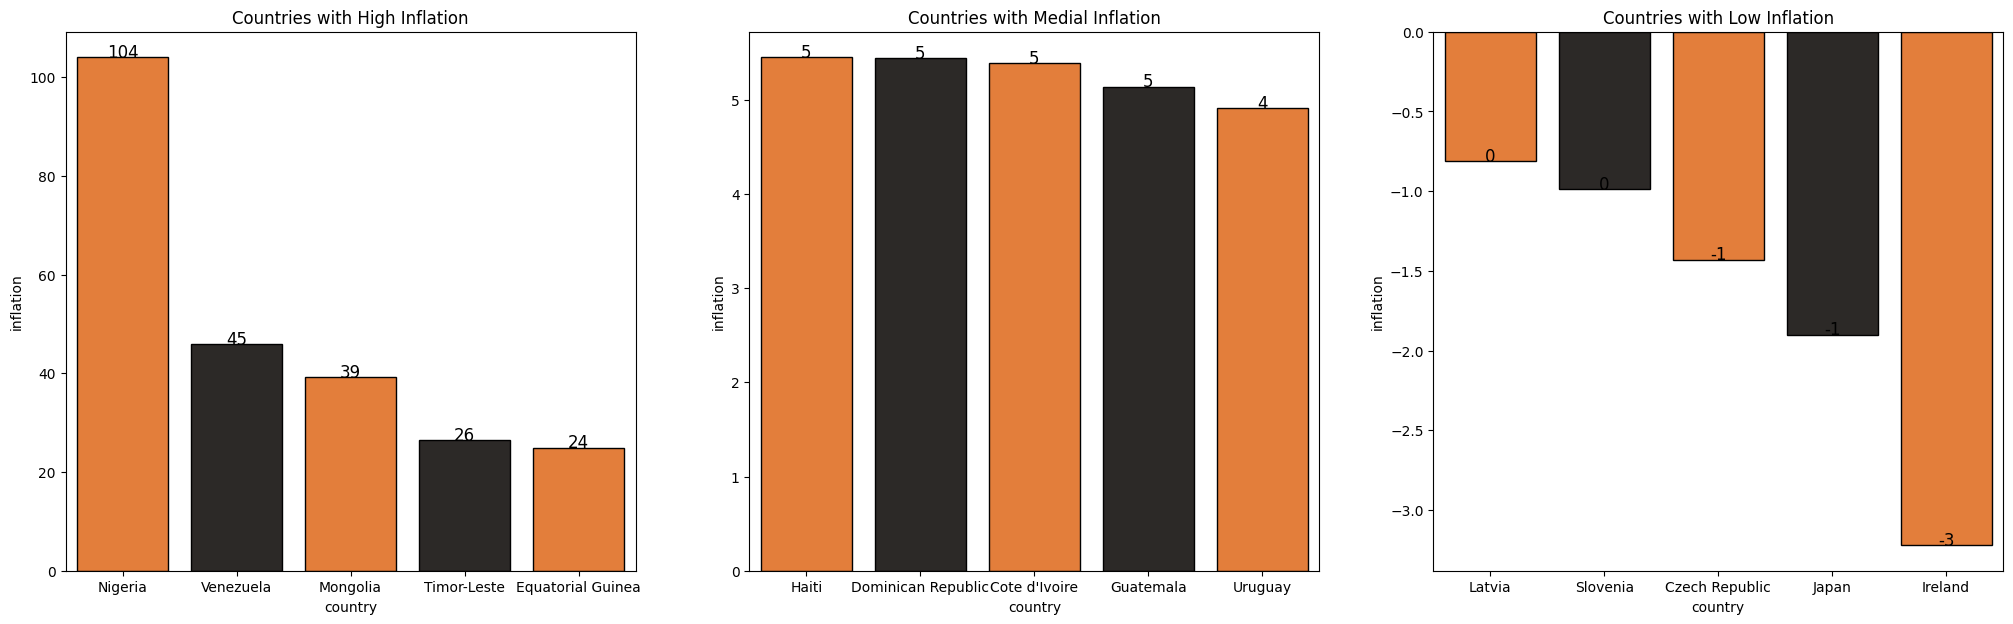

In [18]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

- Higher inflation reduces the purchasing power of citizens.  
- Countries with high inflation often face devastating economic situations:  
  - Such high inflation poses a risk to the very existence of the nation.  
- On the other hand, extremely low inflation can result in deflation:  
  - Deflation signals an economy in a downward spiral.  
  - This can lead to a recession or even a depression.  

life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!

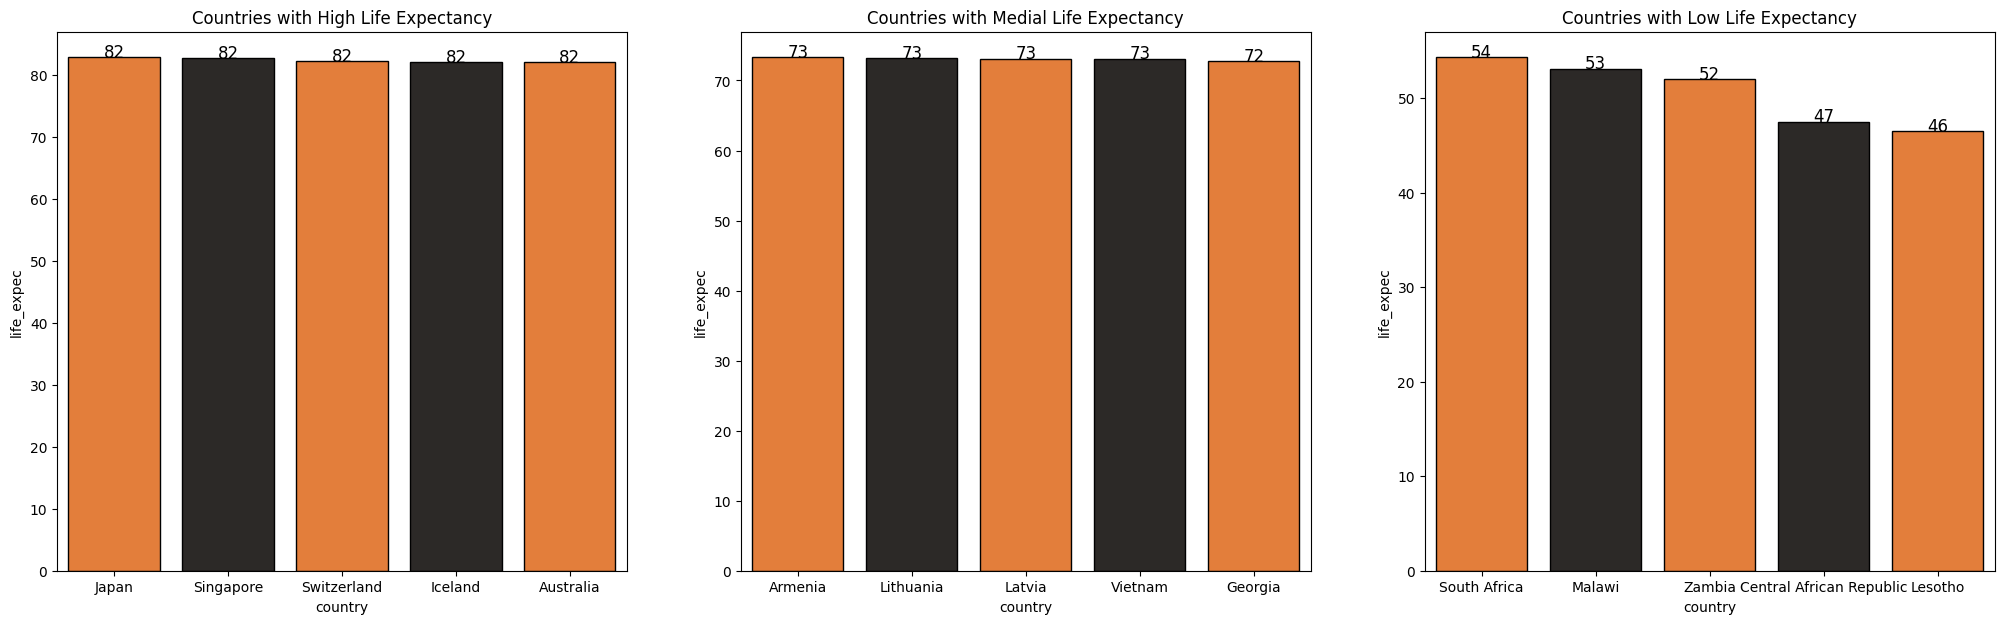

In [19]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

- Life expectancy depends significantly on mental state and the lifestyle adopted by citizens.  
- Singapore is again present in the top 5 for this feature.  
- None of the countries with high life expectancy are in the top 5 for health spending:  
  - This indicates that life expectancy is not directly related to the spending done by citizens on health.  
- African countries are once again present in the lower end for this feature.  

**total_fer** : Economically backward countries have a high fertility rate!

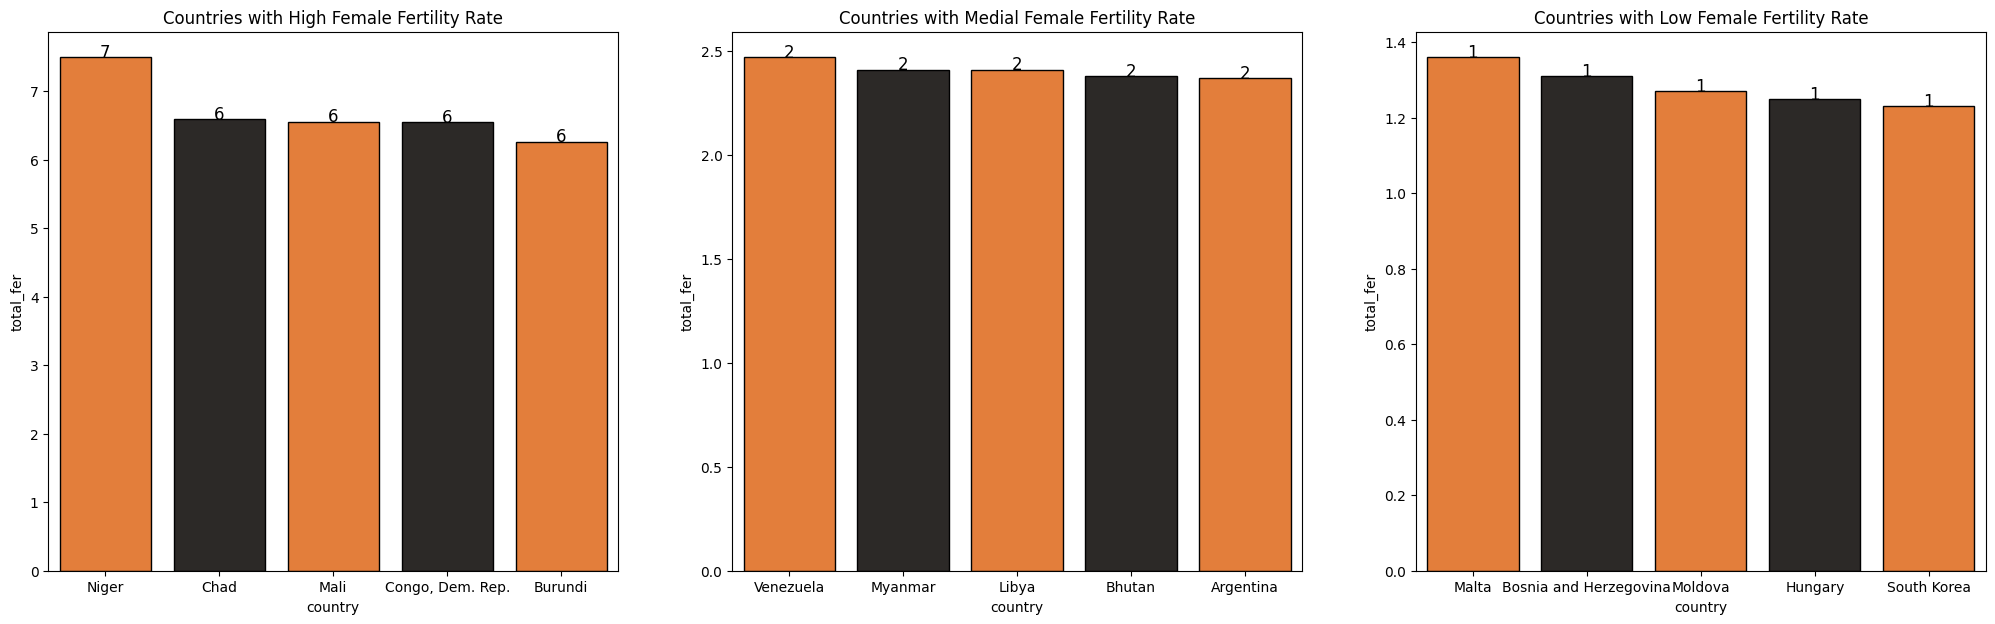

In [20]:
ig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!

African countries dominate the total_fer with values 6+.
Mean total_fer value is 2 whereas lower end values of 1 concern abit as well.

gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!

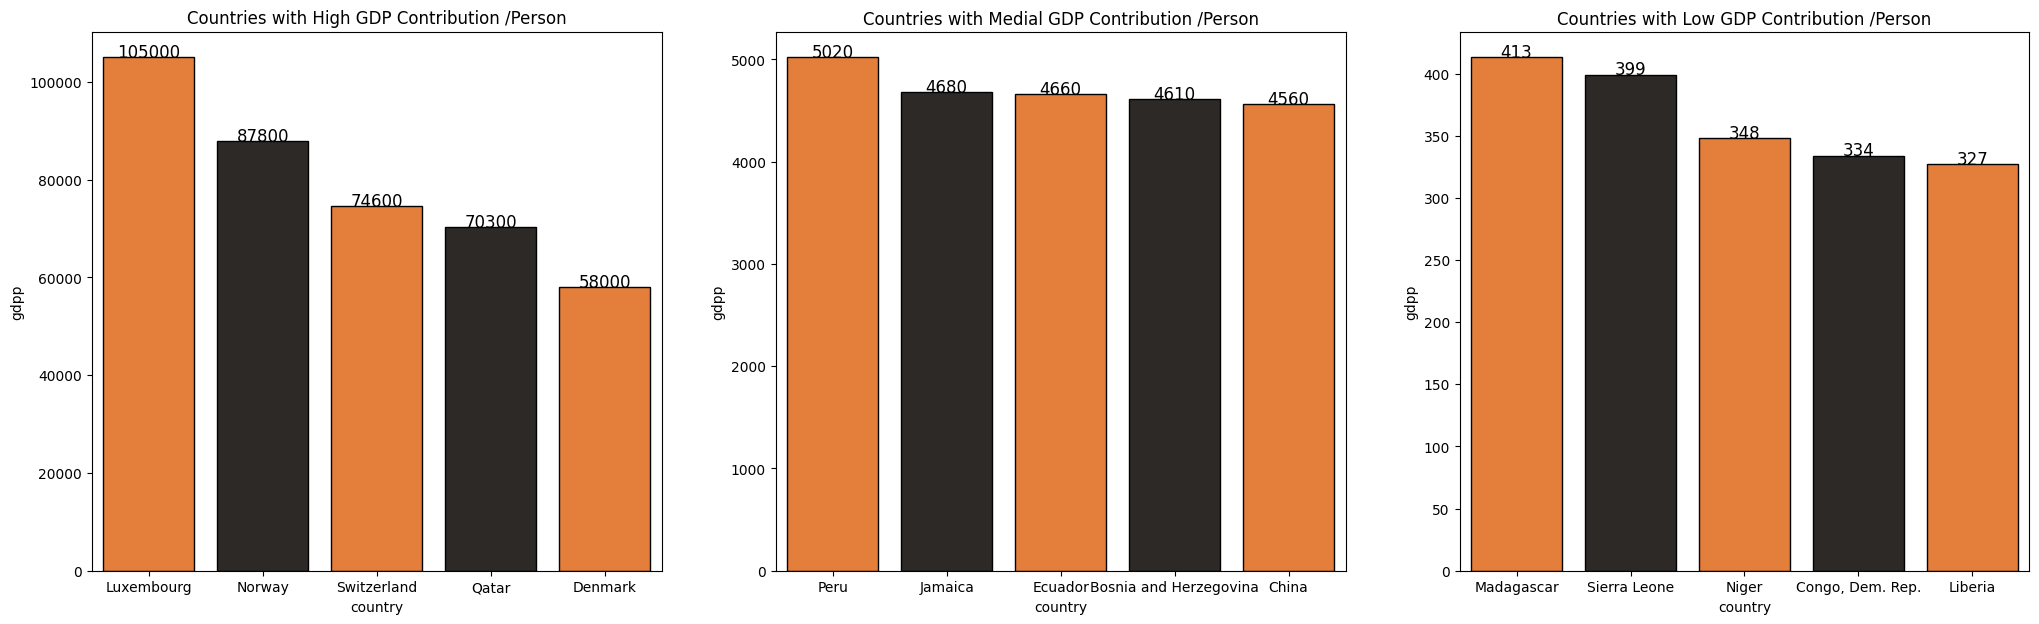

In [21]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

- This feature is tricky as the population of a nation is a significant factor.  
- A clear example is China, which has:  
  - A huge population.  
  - A massive GDP.  
- Luxembourg is again present among the top ranks.  
- Switzerland and Qatar are in the top 5, similar to the income feature.  
- The lower end is dominated by African nations:  
  - This highlights their status as economically backward regions.  

Numerical Features :

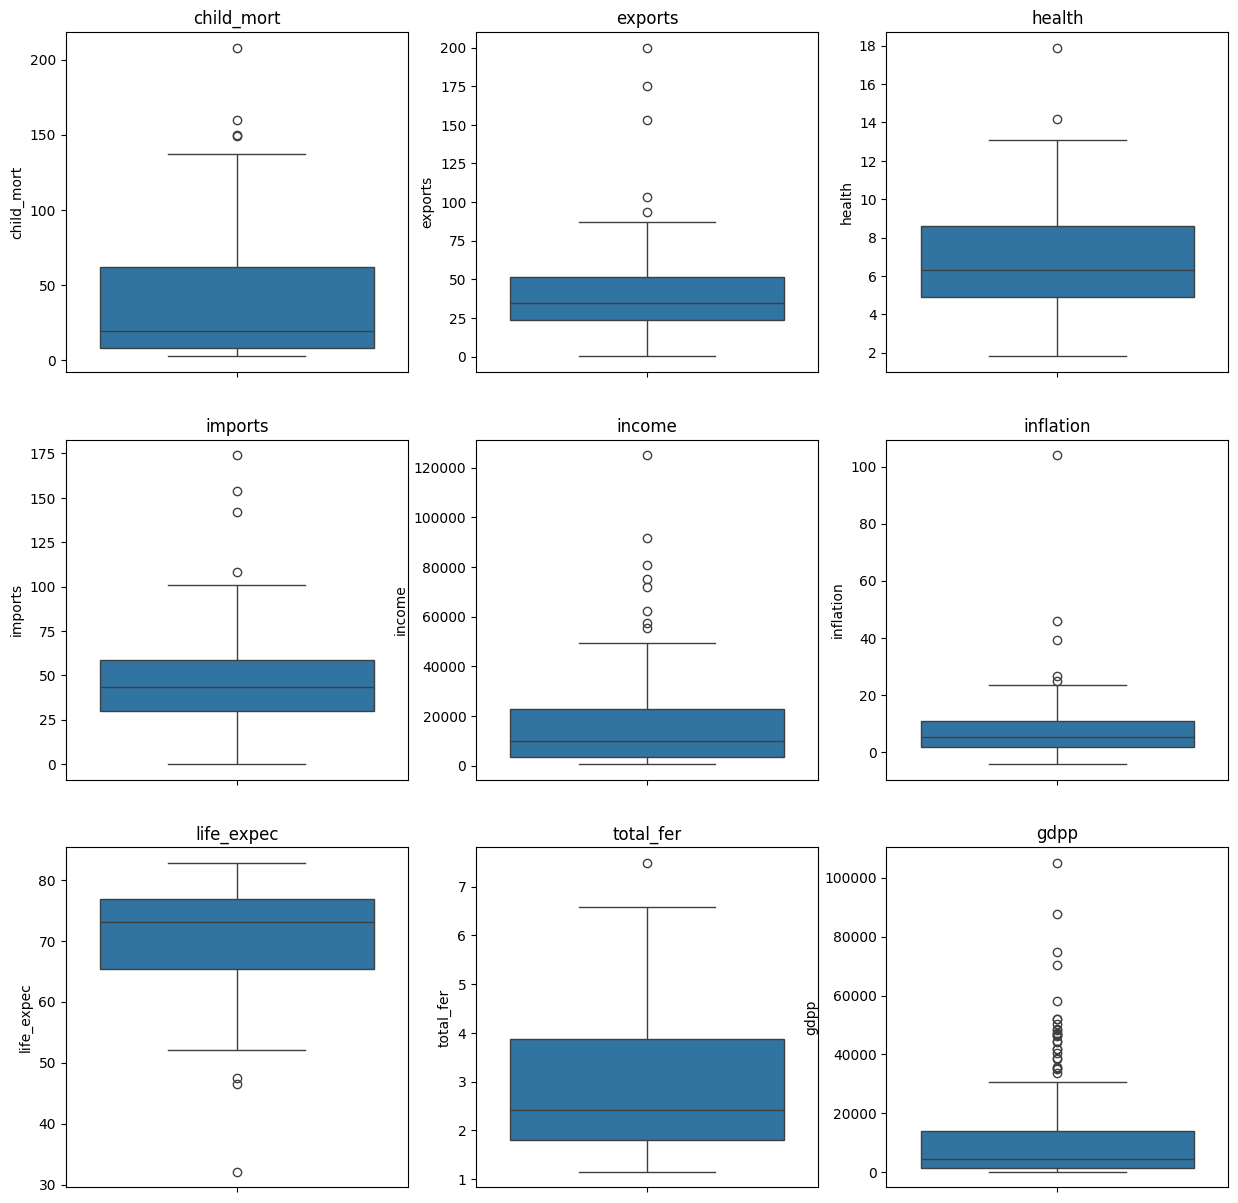

In [22]:
#let's use boxplots to check the outliers in the numerical features
#create a subplot with 3 rows 3 columns and figsize 15,15
fig  = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]])
    plt.title(numerical_features[i])
plt.show()

# Summary EDA

- **Insights from Economically Backward Nations:**  
  - **Health Conditions:**  
    - African countries rank high in unfavorable health metrics such as:  
      - High child mortality (child_mort).  
      - Low life expectancy (life_expec).  
      - High total fertility rate (total_fer).  
    - Haiti holds the top spot for high child mortality.  
    - Asian and European countries dominate the lower end of child mortality rates.  
    - US citizens are the highest spenders on health:  
      - However, the US is not in the top 5 for life expectancy or fertility rates.  
      - None of the countries with high life expectancy are in the top 5 for health spending.  
      - Asian countries dominate the lower end of health spending.  

  - **Imports and Exports:**  
    - Singapore, Malta, Luxembourg, and Seychelles are in the top 5 for both imports and exports.  
    - Population size and geographical location play key roles in imports and exports.  
    - Sudan is the only African nation with low imports.  
    - Brazil has the lowest imports globally.  

  - **Inflation:**  
    - African countries show very high inflation values.  
    - Low inflation values can be found across countries from all continents.  

  - **Income and GDP:**  
    - Qatar's citizens are the highest-paid globally.  
    - Singapore and Luxembourg are also in the top 5 for income.  
    - Luxembourg is among the top ranks for GDP.  
    - Switzerland and Qatar are in the top 5 for GDP, similar to income.  
    - African nations dominate the lower end of income and GDP.  
    - Colonization has significantly impacted African nations, contributing to their economic struggles.  

  - **Key Takeaway:**  
    - It is crucial to assist African nations during unforeseen turmoil due to the severity of their challenges.

Feature Engineering

Correlation Matrix :

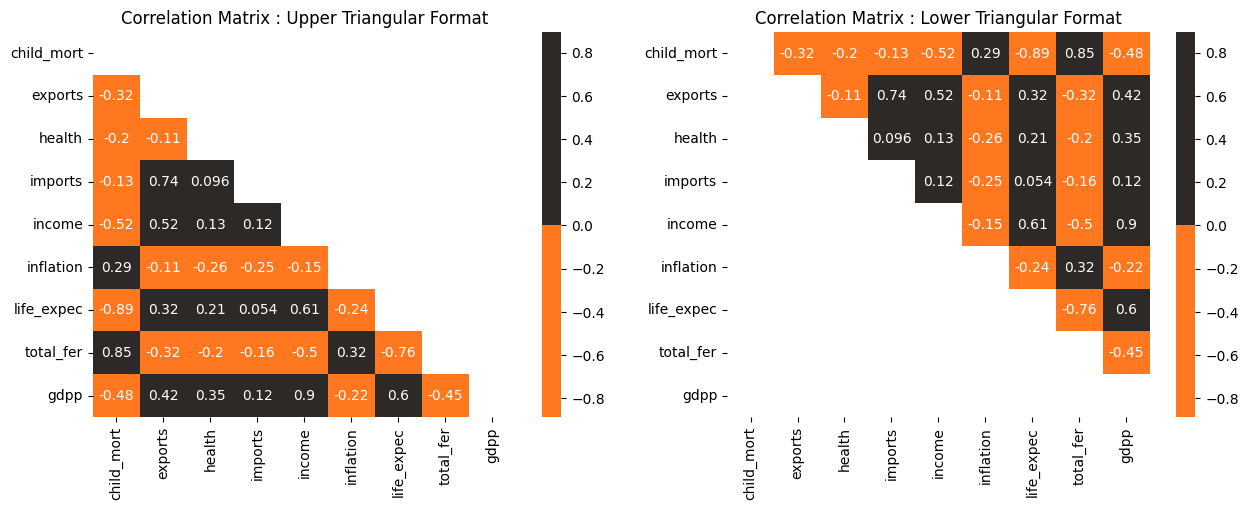

In [23]:
data_without_country = data.copy()   #copy the data dataframe
data_without_country = data_without_country.drop(labels=['country'] , axis=1 ) #drop the country field because in correlation matrix we cannot have categorical features
#create the triangular upper matrix and lower matrix for the correlation matrices
ut = np.triu(data_without_country.corr())
lt = np.tril(data_without_country.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
#cerate the sns heatmapp for both, and use the mask one as ut and one as lt
sns.heatmap( data_without_country.corr() ,cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(data_without_country.corr() ,cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');
#why do we do it with masking not just put them both directly ?

- **Feature Relationships:**
  - **Child Mortality (child_mort):**
    - Increases when **income**, **gdpp**, and **exports** decrease.
    - Increases with a rise in **inflation**.
    - Economic conditions strongly influence child mortality.
  - **Exports:**
    - An increase in **exports** leads to higher **gdpp**, **income**, and **imports**.
  - **Health Expenditure (health):**
    - A rise in **health spending** slightly increases **life_expec** and decreases **child_mort**.
  - **Income and GDP Per Capita (income & gdpp):**
    - High correlation (0.9) between **income** and **gdpp**.
    - Higher **income** leads to increased **life_expec** and significantly lowers **total_fer**.
  - **Inflation:**
    - High **inflation** negatively impacts financial features.
    - Associated with high **child_mort** and **total_fer**, often seen in less developed nations.
  - **Life Expectancy (life_expec):**
    - Higher **life_expec** is linked to lower **total_fer**.
  - **GDP Per Capita (gdpp):**
    - Higher **gdpp** promotes more health spending.

- **Feature Categories:**
  1. **Health:**
     - **child_mort**, **health**, **life_expec**, **total_fer**
  2. **Trade:**
     - **imports**, **exports**
  3. **Finance:**
     - **income**, **inflation**, **gdpp**

- **Next Step:**
  - Dissolve features into the identified categories (**health**, **trade**, **finance**).
  - Normalize the data for further analysis.

Steps you need to do here:

1.Normalize the data per feature by dividing by the mean value

2.aggregate the normalized data per feature to get a clean result for the new categories






In [24]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


Data Scaling :

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization: it is needed because the data categories have different units and scales, so we need to normalize them
ss = StandardScaler() # Standardization: After normalization, we need to make these data points at the same scale.
#Without standardization, features with larger ranges could dominate the learning process, leading to biased results.

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1['country'] = data['country'] ### Now add the country column
df1.head()

,Health,Trade,Finance,country
0,0.63,0.14,0.08,Afghanistan
1,0.13,0.20,0.09,Albania
2,0.18,0.19,0.21,Algeria
3,0.66,0.28,0.24,Angola
4,0.12,0.28,0.15,Antigua and Barbuda


Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.
Eg : Age = Years; FastingBS = mg / dl; Charges = Currency

We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

Normalization : Health, Trade and Finance features are normalized!

Standardization : None of the features are standardized for the above data.

Principal Component Analysis (PCA) :

it is a dimension reduction method that is preferrably used for an Unsupervised Learning Problem.

In [26]:
df2 = data.copy() #copy the data df

col = list(data.columns)
col.remove('health') #remove health column
col.remove('country') #remove the country column

df2['health'] = ss.fit_transform(data[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


*Before passing the data for PCA transformation, normalization & standardization are very important.

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

These are the variance values of the each feature present in the dataset.

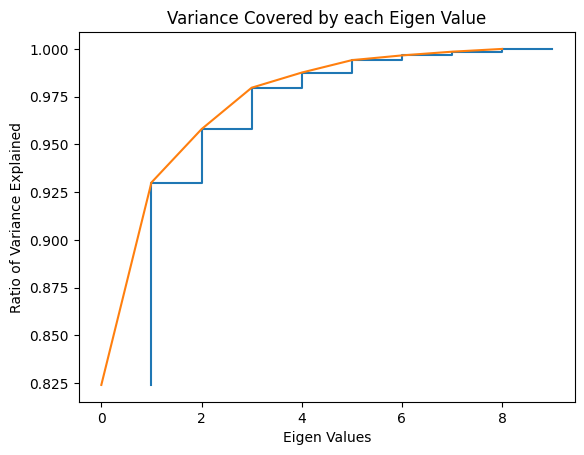

In [28]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

This is a very effective method where we add up the variances of all the features in cummulative format.
Typically eigen values with more than 95% of ratio of variance are selected.
They correspond to the columns of the PCA generated dataframe.
In this case, we select the Eigen Value : 2 as the steps generated have significant variances and thus the other features get dominated by their variances.

In [29]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.22,0.64,0.09
1,-0.08,-0.17,-0.21
2,-0.96,-0.13,-0.13
3,-1.51,0.47,0.28
4,-0.26,-0.24,-0.06




**Objective:**  
Evaluate and compare the performance of models trained on two different datasets:  
1. **Feature Combination Dataset:**  
   - Group features into categories: **Health**, **Trade**, and **Finance**.
   - Aggregate metrics within each category (e.g., Health: child_mort, health, life_expec, total_fer).

2. **PCA Transformed Dataset:**  
   - Apply **Principal Component Analysis (PCA)** to the original dataset.
   - Retain the principal components that explain the majority of the variance.

**Next Steps:**  
1. **Prepare the datasets:**  
   - Compute aggregated values for the feature combination dataset.  
   - Apply PCA to the original dataset.

2. **Train models** on both datasets.

3. **Compare evaluation metrics** (e.g., accuracy, F1-score) to determine which approach performs better.

# ***Modeling***



- **Unsupervised Learning:**
  - The target variable/feature is unknown.
  - Commonly occurs in domains like healthcare, where multiple readings are taken, but the underlying diseases are unknown.
  - Focuses on **searching for patterns** in the data.
  
- **Challenges in Visualization:**
  - Data visualization techniques help reveal insights that are not easily seen in raw tabular data.
  - With large datasets and many features, **data visualization** can become cumbersome and time-consuming.

- **Shift to Algorithmic Approach:**
  - Due to the complexity of visualizing large datasets, an **algorithmic approach** is adopted for more efficient analysis.

In [30]:
m1 = df1.drop(columns =['country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

Here’s your content organized into bullet points:

- **K-Means Clustering:**
  - A distance-based **unsupervised learning algorithm**.
  - Does not support **categorical features**.
  - Widely used for identifying clusters in data using a **mathematical approach**.

- **Working of K-Means Clustering:**
  - Selects 2 centroids randomly (assume k = 2).
  - Calculates the distance between the centroids and all data points.
  - Data points are assigned to the nearest centroid.
  - For each cluster, the **average value** of the data points is calculated.
  - The average values become the new centroids.
  - This process repeats until the centroids **converge to fixed points**.

- **K-Hyperparameter:**
  - Defines the number of clusters or groups to divide the data into.

- **Methods for Selecting the Optimal K:**
  - **Elbow Method:**
    - Plots the sum of squared error (inertia) for a range of k values.
    - The **elbow point** on the plot indicates the optimal k value where the sum of squared errors decreases linearly.
  - **Silhouette Score Method:**
    - Evaluates the quality of clusters by measuring how well data points are clustered with similar points.
    - The **k value with the highest silhouette score** is selected for modeling.

##Feature Combination : Health - Trade - Finance

         Elbow Method & Silhouette Score Method :

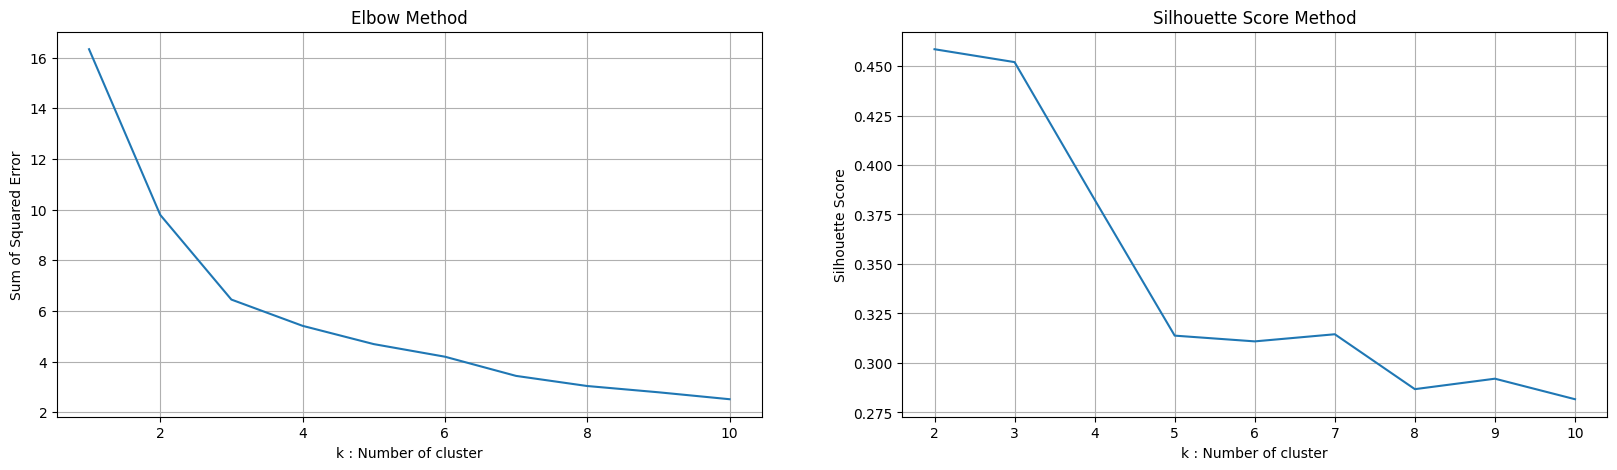

In [31]:
sse = {} #inertia values
sil = [] #silhoutte values
kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, kmax + 1): #test for k from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42) #initiate kmeans clustering, with clusters k, iterations 1000, and fit the feature combination data
    kmeans.fit(m1) #fit the data
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values())); #line plot for inertia
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42) #kmeans cluster and fit
    kmeans.fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels)) #calculate the silhoutte score using euclidean distance
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()


From the results of the above 2 methods, we select :
k : Clusters = 3

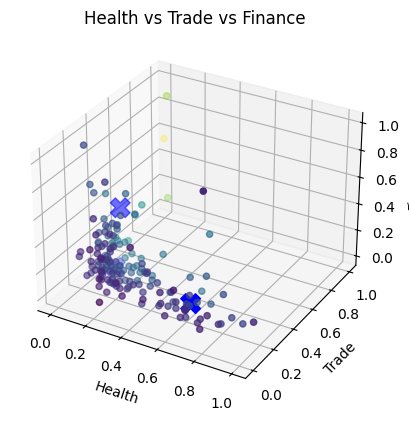

In [32]:
k=3
model =  KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)#based on above results, calculate kmeans for k = 3
model.fit(df1[['Health', 'Trade', 'Finance']]) # fit the feature combination dataset
# Step 4: Get the centroids
centroids = model.cluster_centers_  # Get the centroids
labels = model.labels_
df1['Class'] = labels; data['Class'] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='b', s=200, label='Centroids')
ax.scatter(x,y,z,c = y)
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

We again check the scatterplot of income & child_mort w.r.t labelled clusters for confirming the cluster values!
We know that low income and high child mortality is a sign of an economically backward nation.

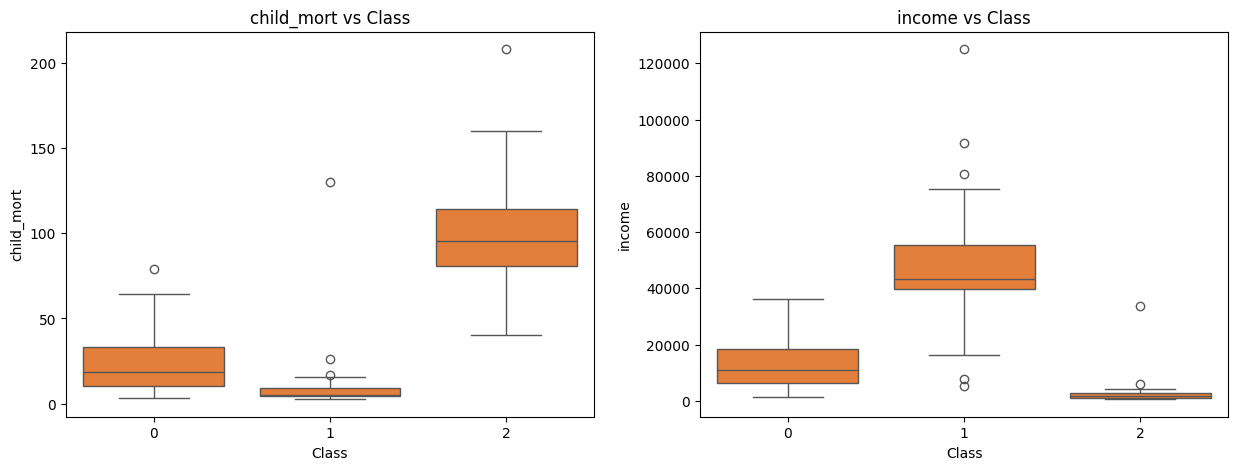

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

2 need help
1 no need help
0 might need help

In [41]:
import plotly.express as px

# Assuming df1 has a column named 'Country'
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Help Needed'

fig = px.choropleth(df1,
                    locationmode='country names',
                    locations='country',  # Use 'Country' if that's the correct column name
                    color='Class',  # Use 'Class' directly
                    title='Needed Help Per Country (World)',
                    color_discrete_map={
                        'Help Needed': 'Red',
                        'No Help Needed': 'Green',
                        'Might Need Help': 'Yellow'
                    }
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Labels', legend_title_side='top', title_pad_l=260, title_y=0.86)
fig.show()

In [42]:
import plotly.express as px
import pandas as pd



# Map the Class values to descriptive labels
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Help Needed'

# Create the choropleth map
fig = px.choropleth(df1,
                    locationmode='country names',
                    locations='country',  # Ensure this matches the column name in df1
                    color='Class',
                    title='Needed Help Per Country (World)',
                    color_discrete_map={
                        'Help Needed': 'Red',
                        'No Help Needed': 'Green',
                        'Might Need Help': 'Yellow'
                    }
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Labels', legend_title_side='top', title_pad_l=260, title_y=0.86)
fig.show()

##PCA Data
Do the same for PCA Data



```
Elbow Method & Silhouette Score Method :
```



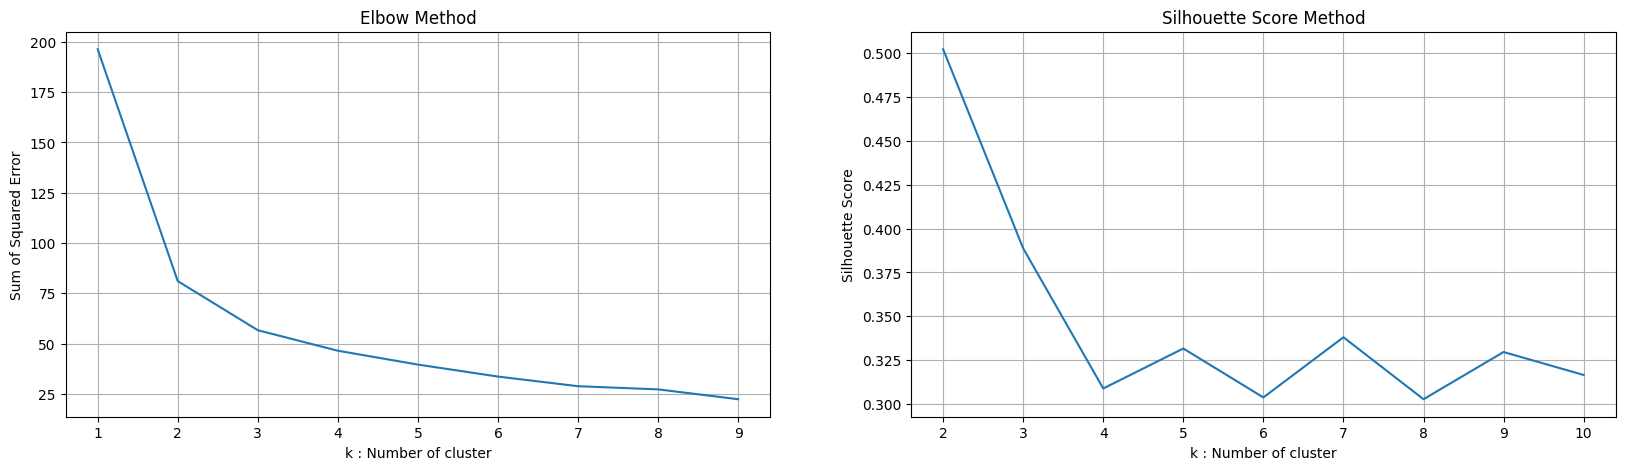

In [48]:


# Now proceed with the KMeans fitting
sse = {}
sil = []
kmax = 10
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Elbow Method:
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(m2)  # Fitting with updated column names
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method:
plt.subplot(1, 2, 2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(m2)  # Fitting with updated column names
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

From the results of the above 2 methods, we select :

k : Clusters = 3

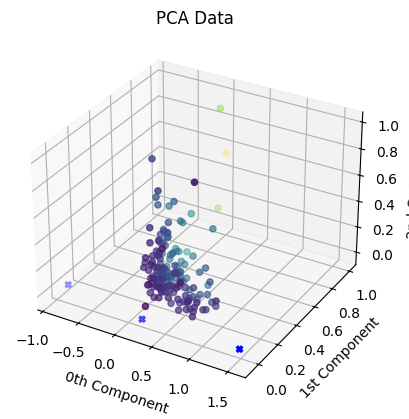

In [35]:
k=3
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42) #kmeans for k = 3 and iterations 1000
model.fit(m2)
cluster = model.cluster_centers_ #Fixed this line
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels
pca_df2['Class'] = labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
ax.scatter(x,y,z,c = y)
plt.show();



We again check the scatterplot of income & child_mort w.r.t labelled clusters for confirming the cluster values!

We know that low income and high child mortality is a sign of an economically backward nation.

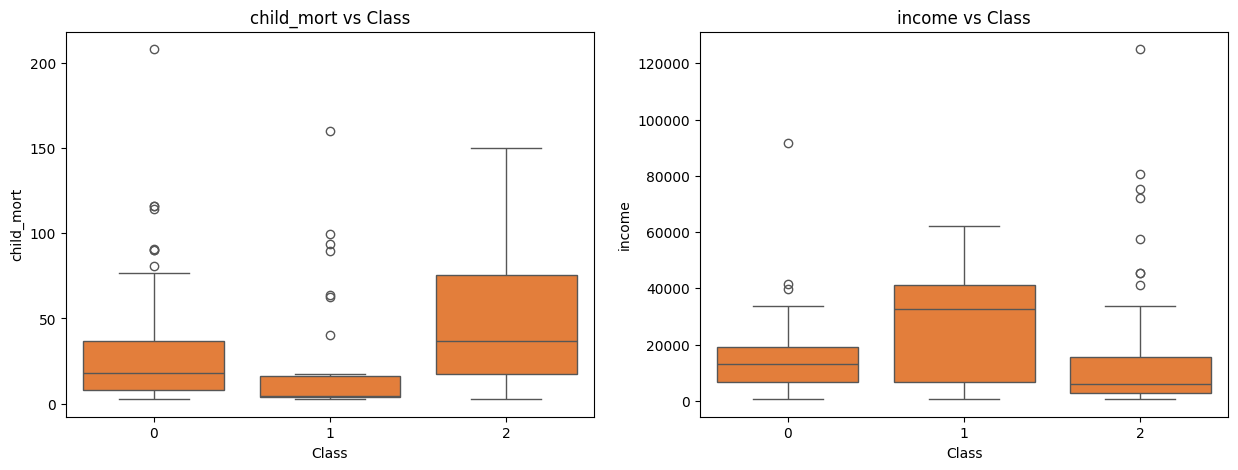

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()



*   0  Might need help
*   1  No Help Needed
*   2  Need help




In [39]:
pca_df2.insert(0,column = 'Country', value = data['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'No Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

##Density Based Spatial Clustering of Application with Noise Clustering

Here’s your content organized into bullet points:

- **DBSCAN Clustering:**
  - A **density-based clustering algorithm** used for unsupervised learning problems.
  - Addresses the limitations of **K-Means Clustering**, such as handling nested and high-dimensional data.

- **Important Terms in DBSCAN:**
  - **Core Point:**  
    - A center point with at least `minPts` number of data points in its vicinity.  
    - These points can extend the cluster.
  - **Non-Core Point:**  
    - A point that does not have `minPts` number of data points in its area.  
    - It cannot extend the cluster but remains part of it.
  - **Outliers / Noise:**  
    - Data points that are not part of any cluster.

- **Important Hyperparameters:**
  - **minPts:**  
    - The minimum number of data points required for a point to be considered a core point.
  - **Epsilon:**  
    - The radius around the center point used to check for nearby points.

- **DBSCAN Clustering Process:**
  1. Select a random data point and consider it as a center point.
  2. Check other data points in the **Epsilon**-radius area of the center point.
  3. If there are at least `minPts` data points in the area, the center point becomes a **core point**.
  4. Core points extend the cluster by applying the same rules recursively.
  5. Non-core points are added to the cluster but cannot extend it.
  6. Once core points have extended the cluster, non-core points are included, and the cluster is complete.
  7. New clusters are formed following the same procedure.  
  8. **Outliers** are points that do not belong to any cluster.

- **Hyperparameter Selection:**
  - **minPts:**  
    - `minPts` should be at least `D + 1`, where `D` is the number of dimensions/features.  
    - For smaller or noisy datasets, typically `minPts ≥ 2 * D`.
  - **Epsilon:**  
    - Determined using the **k-distance graph** from the KNN model.  
    - The value at which the graph sharply changes is selected for Epsilon.

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Feature Combination : Health - Trade - Finance

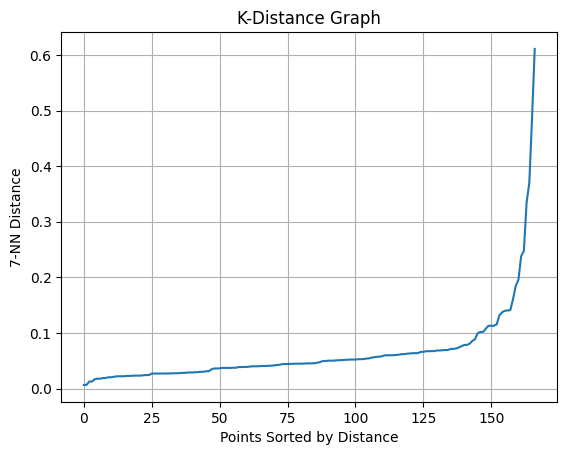

In [50]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

- **Selection of minPts:**  
  - `minPts = 8` (satisfies the condition `minPts ≥ 2 * 3 features`).  

- **Value assigned to n_neighbors:**  
  - `n_neighbors = minPts - 1 = 7`.  

- **Selection of Epsilon (eps):**  
  - From the graph, `eps = 0.08`.  

In [51]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels

Number of Clusters :  3
Number of Outliers :  67


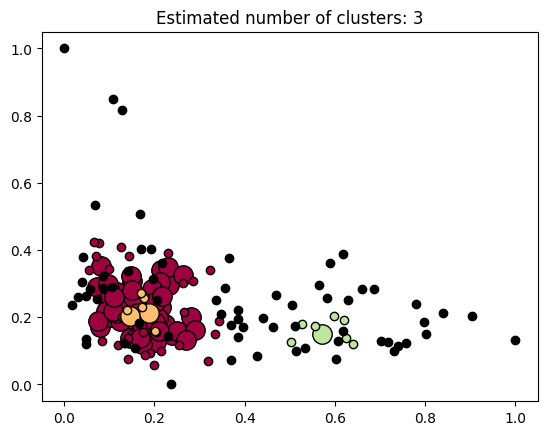

In [52]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Now we have got the clusters but we don't know which value corresponds to what!
Hence, we draw a boxplots of income & child_mort w.r.t labelled clusters!
We know that low income and high child mortality is a sign of an economically backward nation.

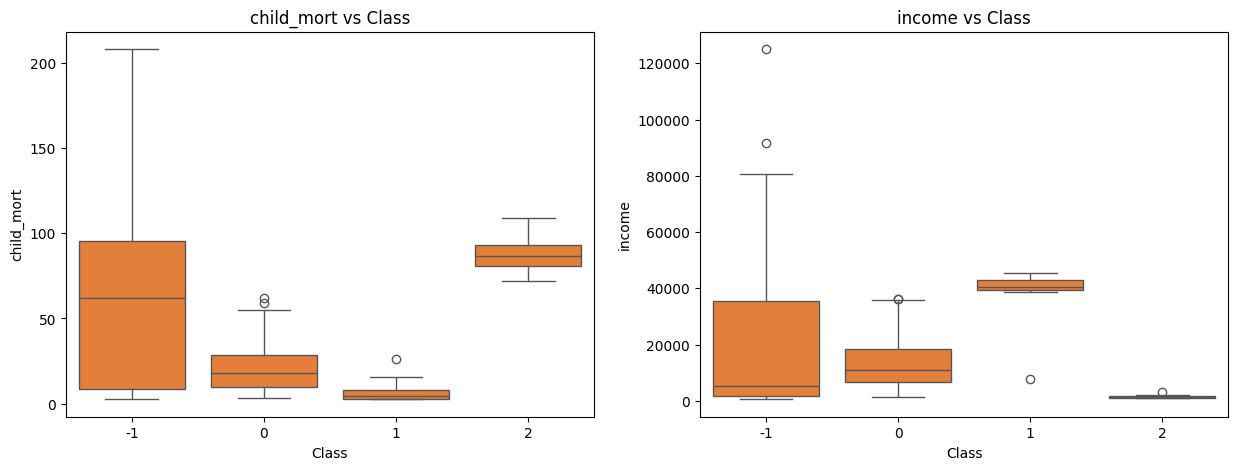

In [53]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- **Rule for -1:**  
  - `-1` is associated with **Noise / Outliers**.  

- **Cluster Interpretation from the Plot:**  
  - `-1`: **Noise / Outliers**  
  - `0`: **Might Need Help**  
  - `1`: **No Help Needed**  
  - `2`: **Help Needed**  

In [55]:
df1['Class'].loc[df1['Class'] == -1] = 'Noise / Outliers'
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] ='Help Needed'

fig = px.choropleth(df1[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# PCA Data

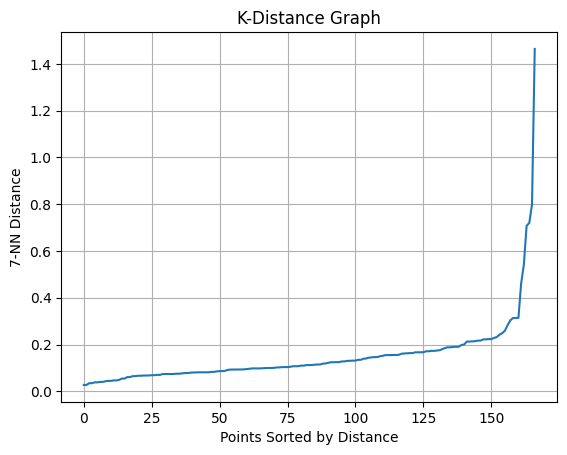

In [56]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');
plt.grid()
plt.plot(distances);


Selection of minPts:

minPts = 8 (meets the condition minPts ≥ 2 * number of features = 2 * 3).
Value assigned to n_neighbors:

n_neighbors = minPts - 1 = 7.
Selection of Epsilon (eps):

From the graph, eps = 0.08.







In [57]:
db = DBSCAN(eps = 0.2, min_samples = 8).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; pca_df2['Class'] = labels

Number of Clusters :  3
Number of Outliers :  94


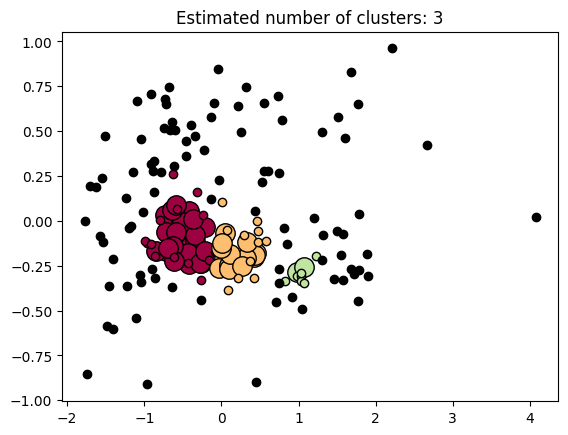

In [58]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Draw boxplots:

Create boxplots of income and child_mort with respect to the labeled clusters.
Purpose:

To identify the assistance required by the nations.
Key Insight:

Low income and high child mortality indicate an economically backward nation.

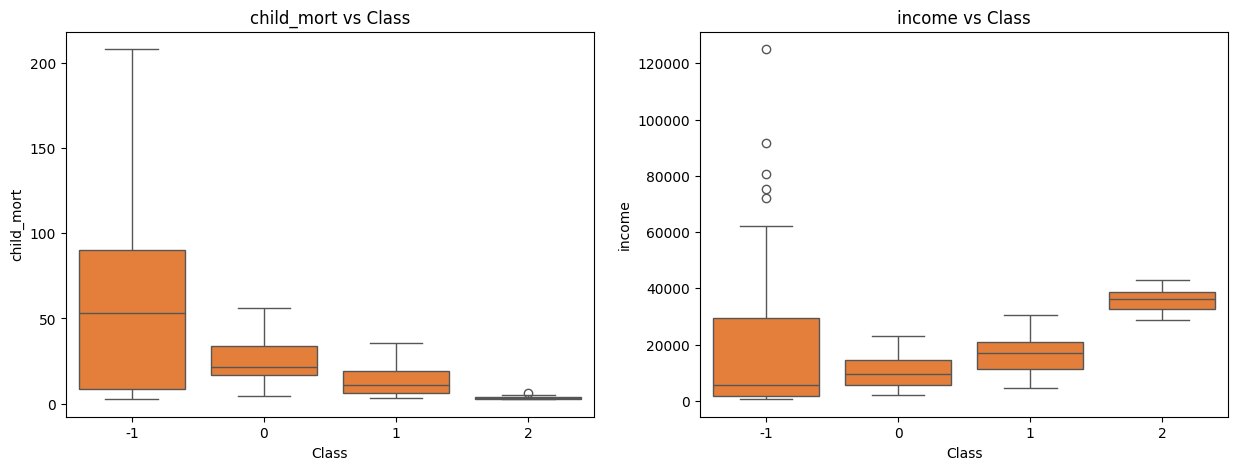

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- **Conclusions from the plot:**  
  - `-1`: **Noise / Outliers**  
  - `0`: **Help Needed**  
  - `1`: **Might Need Help**  
  - `2`: **No Help Needed**  

In [60]:
pca_df2['Class'].loc[pca_df2['Class'] == -1] = 'Noise / Outliers'
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] ='No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color_discrete_sequence=["orange", "red", "green",'black'],
                    color = pca_df2['Class'],
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')